#Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster

#Loading Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving fish.csv to fish.csv


In [3]:
df = pd.read_csv('fish.csv',header=None)
#df.columns = ['Species', 'Weight','Length1','Length2','Length3','Height','Width']
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


#Preprocessing

In [4]:
# considering all columns
X=df.iloc[:,1:].values

In [5]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
#checking for missing value
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


<Axes: ylabel='1'>

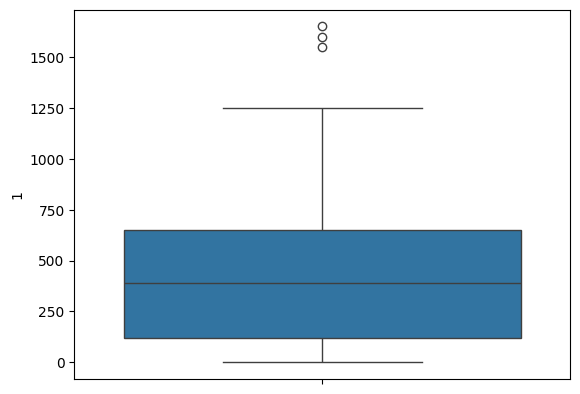

In [7]:
#Outliers
sns.boxplot(df[1])

<Axes: ylabel='2'>

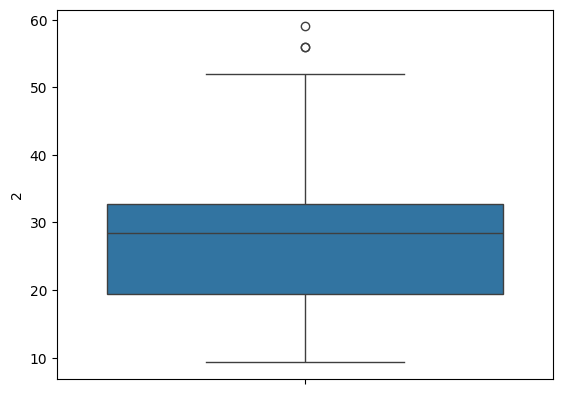

In [8]:
sns.boxplot(df[2])

<Axes: ylabel='3'>

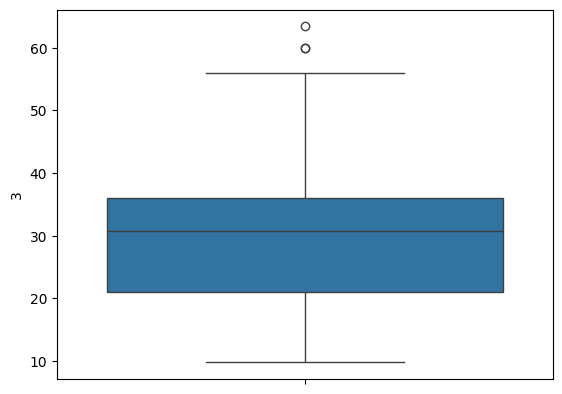

In [9]:
sns.boxplot(df[3])

<Axes: ylabel='4'>

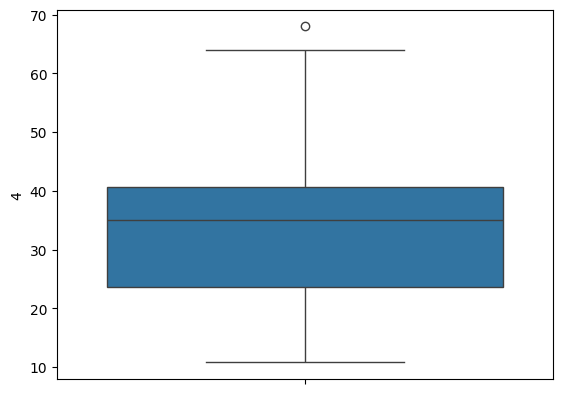

In [10]:
sns.boxplot(df[4])

<Axes: ylabel='5'>

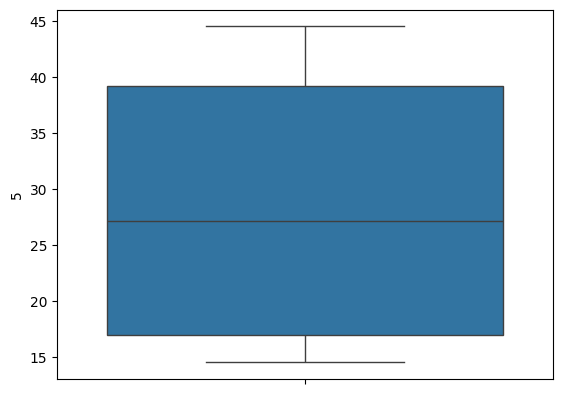

In [11]:
sns.boxplot(df[5])

<Axes: ylabel='6'>

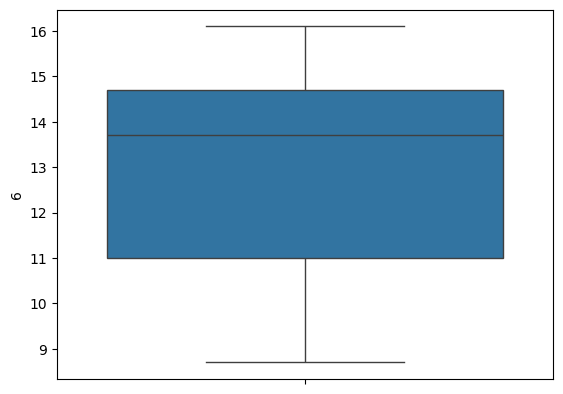

In [12]:
sns.boxplot(df[6])

In [13]:
#Outliers Handling
numerical_columns=df.select_dtypes(include=['number']).columns
numerical_columns

Index([1, 2, 3, 4, 5, 6], dtype='int64')

In [14]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [15]:
#Encoding
le = LabelEncoder()
df[0] = le.fit_transform(df[0])
df.head()

,0,1,2,3,4,5,6
0,0,242.0,23.2,25.4,30.0,38.4,13.4
1,0,290.0,24.0,26.3,31.2,40.0,13.8
2,0,340.0,23.9,26.5,31.1,39.8,15.1
3,0,363.0,26.3,29.0,33.5,38.0,13.3
4,0,430.0,26.5,29.0,34.0,36.6,15.1


In [16]:
#Scaling
sc = StandardScaler()
df[[1,2,3,4,5,6]] = sc.fit_transform(df[[1,2,3,4,5,6]])
df.head()

,0,1,2,3,4,5,6
0,0,-0.457790,-0.288320,-0.258429,-0.139675,0.956192,0.200341
1,0,-0.296678,-0.204010,-0.171048,-0.034838,1.113514,0.392954
2,0,-0.128852,-0.214549,-0.151629,-0.043574,1.093849,1.018945
3,0,-0.051653,0.038382,0.091098,0.166100,0.916862,0.152188
4,0,0.173233,0.059460,0.091098,0.209783,0.779205,1.018945


#k-means

In [21]:
# considering all columns after outlier handling
X_processed = df.iloc[:,1:].values

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i , init='k-means++')
  kmeans.fit(X_processed)
  wcss.append(kmeans.inertia_)

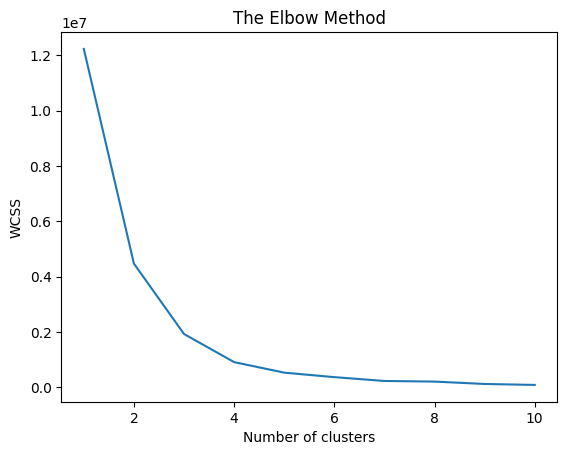

In [18]:
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# from the elbow  plot, we can fix value of k as 5
#building the kmeans clustering model
kmeans = KMeans(n_clusters=3, init='k-means++')
#max_iter can be set if we need to fix the number of iterations
y_kmeans = kmeans.fit_predict(X_processed) #output generation

In [23]:
df['Cluster'] = y_kmeans
display(df.head())

,0,1,2,3,4,5,6,Cluster
0,0,-0.457790,-0.288320,-0.258429,-0.139675,0.956192,0.200341,1
1,0,-0.296678,-0.204010,-0.171048,-0.034838,1.113514,0.392954,1
2,0,-0.128852,-0.214549,-0.151629,-0.043574,1.093849,1.018945,1
3,0,-0.051653,0.038382,0.091098,0.166100,0.916862,0.152188,1
4,0,0.173233,0.059460,0.091098,0.209783,0.779205,1.018945,1


Visual Representation of Clusters

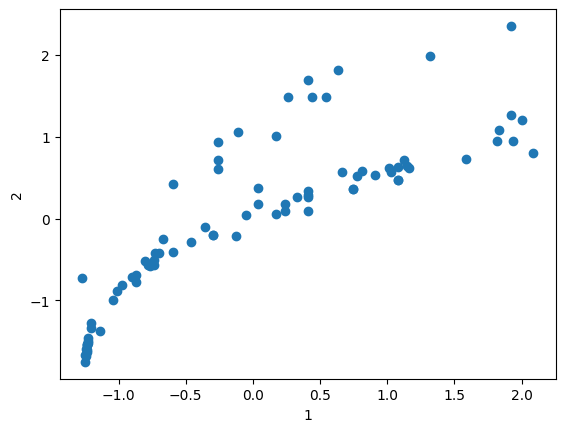

In [24]:
#before clustering
plt.scatter(df[1],df[2])
plt.xlabel('1')
plt.ylabel('2')
plt.show()

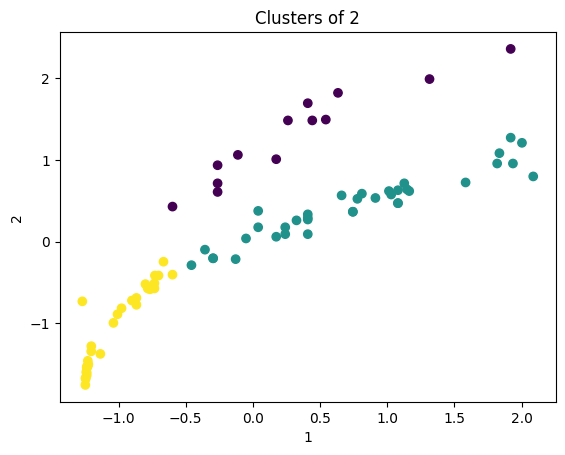

In [25]:
#after clustering
plt.scatter(df[1] , df[2] , c=df['Cluster'])
plt.title('Clusters of 2')
plt.xlabel('1')
plt.ylabel('2')
plt.show()

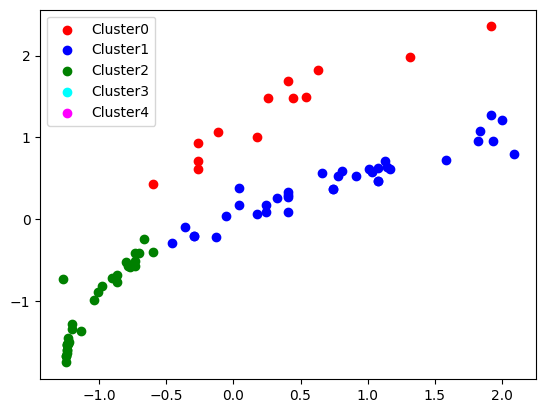

In [26]:
colors =['red','blue','green','cyan','magenta']
for i in range(5):
  cluster = df[df['Cluster']==i]
  plt.scatter(df[df['Cluster']==i][1] , df[df['Cluster']==i][2] , c=colors[i] , label = f'Cluster{i}')
  plt.legend()

In [27]:
#predict the cluster
def predict_cluster(i_1 , i_2, i_3, i_4, i_5, i_6):
  new_data = [[i_1,i_2, i_3, i_4, i_5, i_6]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [28]:
predicted_cluster = predict_cluster(50, 100, 100, 100, 10, 5)
print(predicted_cluster)

0


#Agglomerative Hierarchial Clustering

In [32]:
ag_cluster = linkage(X_processed, method='ward') #ward , singlee, centroid
# linkage matrix i.e; agglomerative cluster model

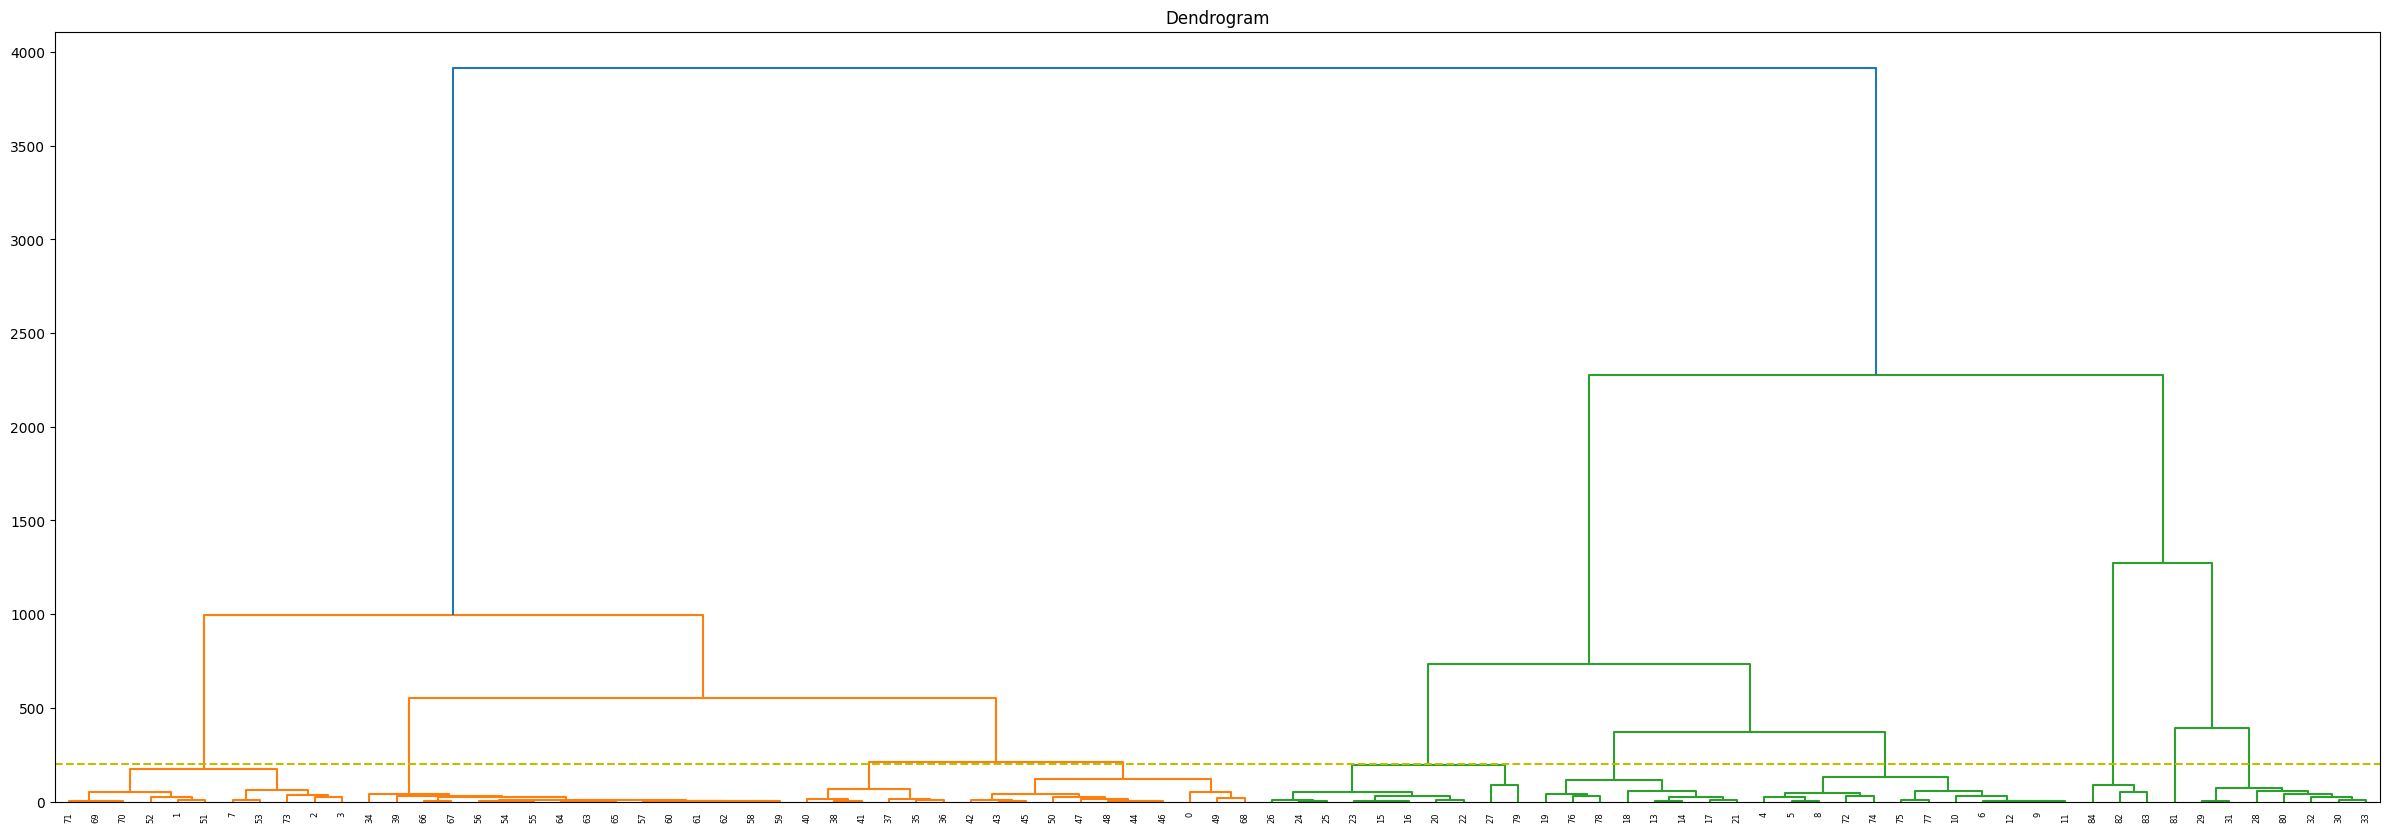

In [30]:
plt.figure(figsize=(30,10))
dendrogram(ag_cluster)
plt.axhline(y=200 , color='y' , linestyle='--')
plt.title('Dendrogram')
plt.show()

In [33]:
cluster_labels = fcluster(ag_cluster , t=2.5 , criterion='distance')

df['Cluster_Agglomerative'] = cluster_labels
df.head()

,0,1,2,3,4,5,6,Cluster,Cluster_Agglomerative
0,0,-0.457790,-0.288320,-0.258429,-0.139675,0.956192,0.200341,1,8
1,0,-0.296678,-0.204010,-0.171048,-0.034838,1.113514,0.392954,1,8
2,0,-0.128852,-0.214549,-0.151629,-0.043574,1.093849,1.018945,1,8
3,0,-0.051653,0.038382,0.091098,0.166100,0.916862,0.152188,1,8
4,0,0.173233,0.059460,0.091098,0.209783,0.779205,1.018945,1,8


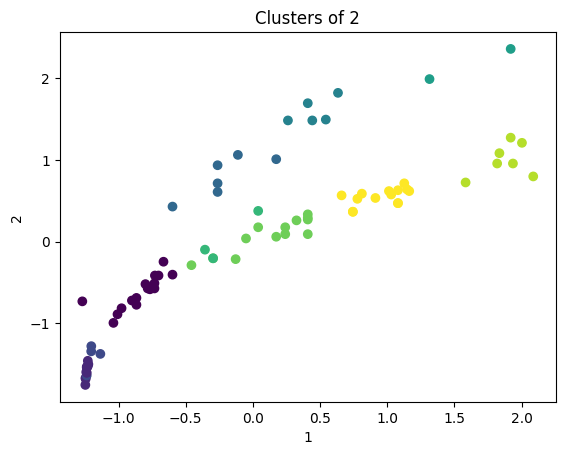

In [34]:
#after clustering
plt.scatter(df[1] , df[2] , c=df['Cluster_Agglomerative'])
plt.title('Clusters of 2')
plt.xlabel('1')
plt.ylabel('2')
plt.show()

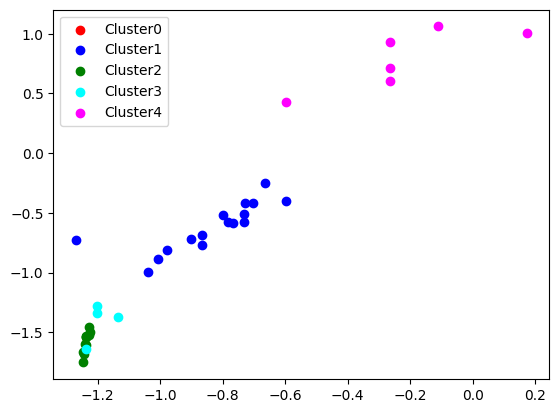

In [35]:
colors =['red','blue','green','cyan','magenta']
for i in range(5):
  cluster = df[df['Cluster_Agglomerative']==i]
  plt.scatter(df[df['Cluster_Agglomerative']==i][1] , df[df['Cluster_Agglomerative']==i][2] , c=colors[i] , label = f'Cluster{i}')
  plt.legend()

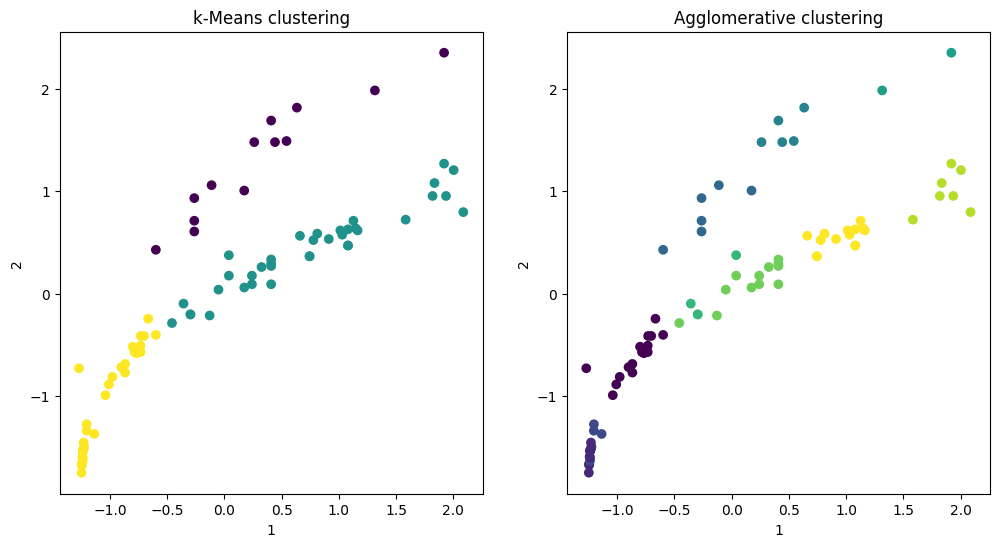

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(df[1] ,df[2] ,c=df['Cluster'])
plt.title('k-Means clustering')
plt.xlabel('1')
plt.ylabel('2')

plt.subplot(1,2,2)
plt.scatter(df[1] ,df[2] ,c=df['Cluster_Agglomerative'])
plt.title('Agglomerative clustering')
plt.xlabel('1')
plt.ylabel('2')
plt.show()